# Box 6.1: Worked example of multiple linear regression: Relative abundance of plant functional types
Paruelo & Lauenroth (1996) analyzed the geographic distribution and the effects of climate variables on the relative abundance of a number of plant functional types(PFTs) including shrubs, forbs, succulents (e.g. cacti), $C_3$ grasses and $C_4$ grasses.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv('../../data/chpt6/paruelo.csv')

In [3]:
df.head()

,C3,C4,MAP,MAT,JJAMAP,DJFMAP,LONG,LAT,LC3,LC4,CLONG,CLAT,RESID1,PREDICT1
0,0.65,0.00,199,12.4,0.12,0.45,119.55,46.40,-0.124939,-1.000000,13.149863,6.295753,-0.029229,-0.095709
1,0.65,0.00,469,7.5,0.24,0.29,114.27,47.32,-0.124939,-1.000000,7.869863,7.215753,-0.028808,-0.096130
2,0.76,0.01,536,7.2,0.24,0.20,110.78,45.78,-0.065502,-0.958607,4.379863,5.675753,0.168066,-0.233568
3,0.75,0.18,476,8.2,0.35,0.15,101.87,43.95,-0.070581,-0.552842,-4.530137,3.845753,0.323799,-0.394380
4,0.33,0.28,484,4.8,0.40,0.14,102.82,46.90,-0.366532,-0.420216,-3.580137,6.795753,-0.096910,-0.269622


* C3 - relative abundance of C3 grasses
* C4 - relative abundance of C4 grasses
* MAP - mean annual precipitation (mm)
* MAT - mean annual temperature (oC)
* JJAMAP - proportion of MAP that fell in June, July and August
* DJFMAP - proportion of MAP that fell in December, January and February
* LONG - longitude in centesimal degrees
* LAT - latitude in centesimal degrees
* LC3 - log10 transformation of C3
* LC4 - log10 transformation of C4
* CLONG - centered LONG
* CLAT - centered LAT
* RESID1 - residuals from linear regression of LC3 against CLAT + CLONG + CLAT*CLONG
* PREDICT1 - predicted LC3 from linear regression of LC3 against CLAT + CLONG + CLAT*CLONG

There were 73 sites across North America. The variables of interest are the relative abundance of $C_3$ plants, the latitude in centesimal degrees (**LAT**), the longitude in centesimal degrees (**LONG**), the mean annual precipitation in mm (**MAP**), the mean annual temperature in °C (**MAT**), the proportion of MAP that fell in June, July and August (**JJAMAP**) and the proportion of MAP that fell in December, January and February (**DJFMAP**).

In [4]:
features = sorted(['C3', 'LAT', 'LONG', 'MAP', 'MAT', 'JJAMAP', 'DJFMAP'])
df = df[features]
df.head()

,C3,DJFMAP,JJAMAP,LAT,LONG,MAP,MAT
0,0.65,0.45,0.12,46.40,119.55,199,12.4
1,0.65,0.29,0.24,47.32,114.27,469,7.5
2,0.76,0.20,0.24,45.78,110.78,536,7.2
3,0.75,0.15,0.35,43.95,101.87,476,8.2
4,0.33,0.14,0.40,46.90,102.82,484,4.8


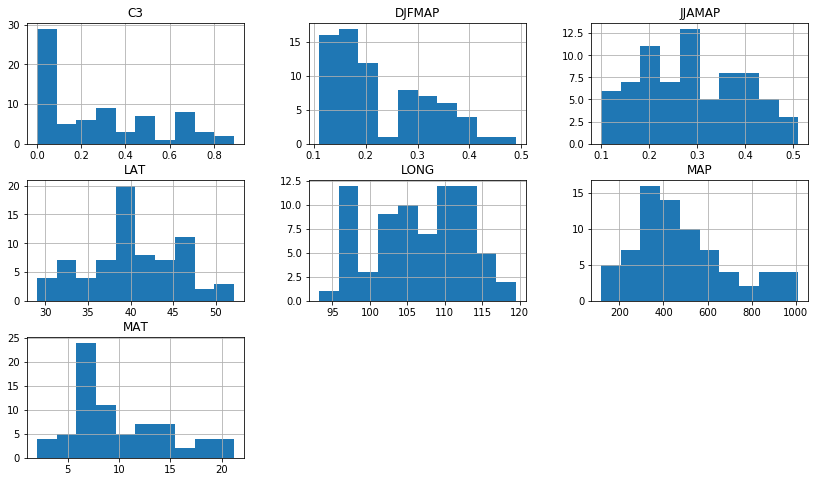

In [5]:
h = df.hist(figsize=(14,8))

The relative abundance of $C_3$ plants was positively skewed and transformed to $log_{10}$ e.g.: $log_{10}(C_3 + 0.1)$

In [6]:
df['C3_log'] = np.log10(df['C3']+0.1)

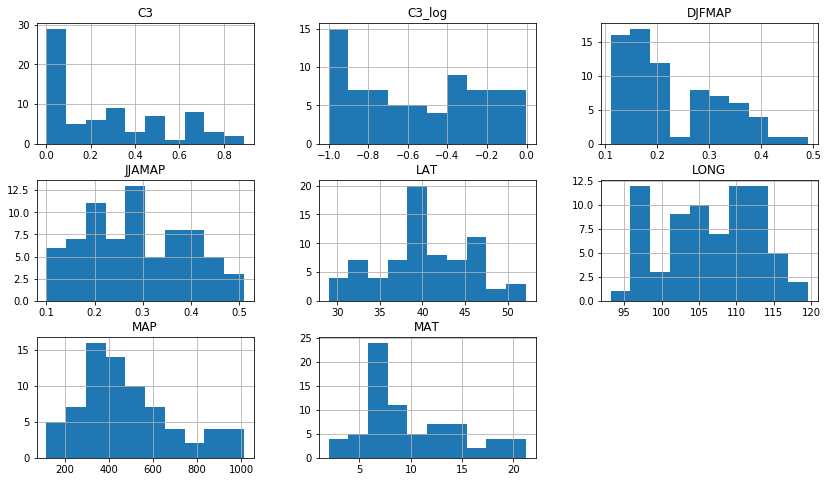

In [7]:
h = df.hist(figsize=(14,8))

In [8]:
df[['LAT', 'LONG', 'MAP', 'MAT', 'JJAMAP', 'DJFMAP']].corr()

,LAT,LONG,MAP,MAT,JJAMAP,DJFMAP
LAT,1.000000,0.096553,-0.246506,-0.838590,0.074175,-0.065125
LONG,0.096553,1.000000,-0.733687,-0.213109,-0.491558,0.770744
MAP,-0.246506,-0.733687,1.000000,0.355091,0.112259,-0.404512
MAT,-0.838590,-0.213109,0.355091,1.000000,-0.080771,0.001478
JJAMAP,0.074175,-0.491558,0.112259,-0.080771,1.000000,-0.791540
DJFMAP,-0.065125,0.770744,-0.404512,0.001478,-0.791540,1.000000


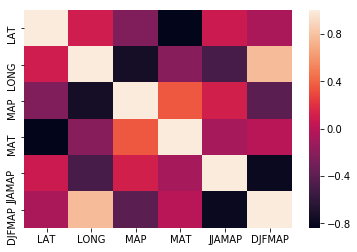

In [9]:
sns.heatmap(df[['LAT', 'LONG', 'MAP', 'MAT', 'JJAMAP', 'DJFMAP']].corr())

A correlation matrix between the predictor variables indicated that some predictors are strongly correlated. Note  the  high  correlations  between  LAT  and  MAT, LONG  and  MAP, and JJAMAP and DJFMAP, suggesting that collinearity may be a problem with this analysis

# Multiple linear regression: Part 1

With six predictor variables, a linear model with all possible interactions would have 64 model terms (plus an intercept) including four-, ﬁve- and six-way interactions that are extremely difﬁcult to interpret. As a ﬁrst pass, we ﬁtted an additive
model:  

$log_{10}(C_3) = \beta_0 + \beta_1(LAT)_i + \beta_2(LONG)_i + \beta_3(MAP)_i + \beta_4(MAT)_i + \beta_5(JJAMAP)_i + \beta_6(DJFMAP)_i + \epsilon_i$

In [10]:
ols_result = ols(formula='C3_log~LAT+LONG+MAP+MAT+JJAMAP+DJFMAP', data=df).fit()

In [11]:
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 C3_log   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     11.61
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           7.79e-09
Time:                        18:03:15   Log-Likelihood:                 4.6703
No. Observations:                  73   AIC:                             4.659
Df Residuals:                      66   BIC:                             20.69
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6886      1.239     -2.170      0.0

### Calculating Tolerance (inverso of Variance Inflaction Factor)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
variables = ols_result.model.exog
var_names = ols_result.model.exog_names
tollerance = [(var_names[i], 1/variance_inflation_factor(variables, i)) for i in range(variables.shape[1])]
tollerance

[('Intercept', 0.000508351932614115),
 ('LAT', 0.2854914313118255),
 ('LONG', 0.18983913377254716),
 ('MAP', 0.35721585876046813),
 ('MAT', 0.2671810447971794),
 ('JJAMAP', 0.316134031171717),
 ('DJFMAP', 0.1751216788166552)]

It is clear that collinearity is a problem with tolerances for two of the predictors (LONG & DJFMAP) approaching 0.1.

# Multiple Regression: Part 2
Paruelo & Lauenroth (1996) separated the predictors into two groups for their analyses. their analyses. One group included LAT and LONG and the other included MAP, MAT, JJAMAP and DJFMAP. We will focus on the relationship between log-transformed relative abundance of $C_3$ plants and latitude and longitude. We fit a multiplicative model including an interaction term that measured how the relationship between $C_3$ plants and latitude could vary with longitude and vice versa:  

$log_{10}(C_3) = \beta_0 + \beta_1(LAT)_i + \beta_2(LONG)_i + \beta_3(LAT x LONG)_i + \epsilon_i$

In [14]:
ols_result_2 = ols(formula='C3_log~LAT+LONG+LAT*LONG', data=df).fit()

In [15]:
print(ols_result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 C3_log   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     24.30
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           7.66e-11
Time:                        18:03:15   Log-Likelihood:                 4.6825
No. Observations:                  73   AIC:                            -1.365
Df Residuals:                      69   BIC:                             7.797
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3910      3.625      2.039      0.0

The very low tolerances indicating high correlations between the predictor variables and their interactions. Centering the predictor variables can resolve the collinearity problem when interactions are considered. Collinearity problems when no interactions are considered should be resolved by omiting highly correletad variables or by using PCE regression analysis.

In [16]:
df_center = df.copy()
df_center['LAT'] = df['LAT']-np.mean(df['LAT'])
df_center['LONG'] = df['LONG']-np.mean(df['LONG'])

In [17]:
ols_result_3 = ols(formula='C3_log~LAT+LONG+LAT*LONG', data=df_center).fit()

In [18]:
print(ols_result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 C3_log   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     24.30
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           7.66e-11
Time:                        18:03:15   Log-Likelihood:                 4.6825
No. Observations:                  73   AIC:                            -1.365
Df Residuals:                      69   BIC:                             7.797
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5529      0.027    -20.130      0.0

As we can see, centering does not affect the regression slope for the highest-order interaction term (LAT:LONG), nor the hypothesis test that the interaction equals zero (p=0.012). 

### Residual plots

Text(0,0.5,'Residuals')

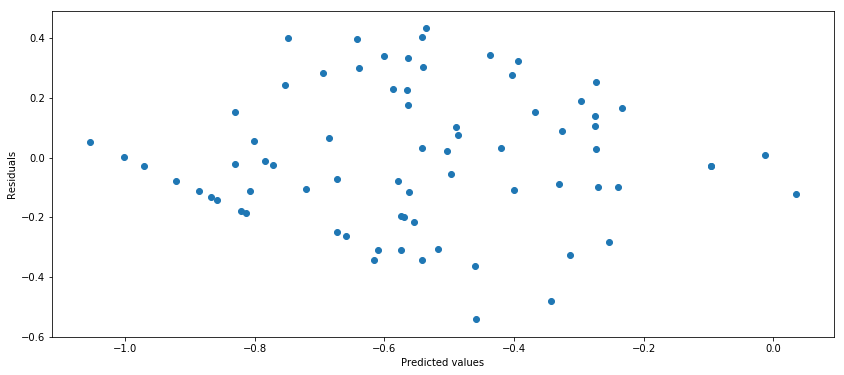

In [19]:
fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(ols_result_3.fittedvalues, ols_result_3.resid, marker='o')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')

### Plot partial regression plot

In [20]:
from statsmodels.graphics.regressionplots import plot_partregress

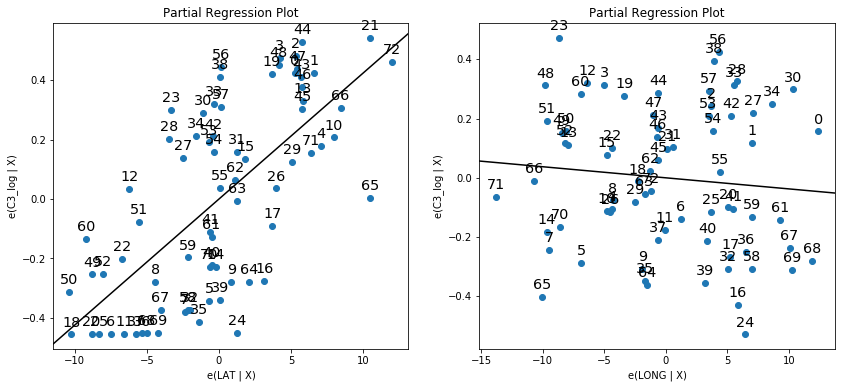

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
f = plot_partregress('C3_log','LAT',['LONG'],data=df_center, ax=ax[0])
f = plot_partregress('C3_log','LONG',['LAT'],data=df_center, ax=ax[1])